https://www.rdkit.org/docs/GettingStartedInPython.html

In [1]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import AllChem
from rdkit.Chem import Draw


In [7]:
radius = 2
m = Chem.MolFromSmiles('c1cccnc1C')
fpgen = AllChem.GetMorganGenerator(radius=radius)
ao = AllChem.AdditionalOutput()
ao.CollectBitInfoMap()
fp = fpgen.GetSparseCountFingerprint(m,additionalOutput=ao)
fp.GetNonzeroElements()

{98513984: 2,
 422715066: 1,
 951226070: 1,
 1100037548: 1,
 1207774339: 1,
 1235524787: 1,
 1751362425: 1,
 2041434490: 1,
 2246728737: 1,
 2614860224: 1,
 3217380708: 1,
 3218693969: 4,
 3776905034: 1,
 3999906991: 1,
 4036277955: 1,
 4048591891: 1}

In [36]:
m = Chem.MolFromSmiles('c1ccccc1C(=O)O')
from time import time
from tqdm import tqdm
from rdkit.Chem.rdMolHash import MolHash

def get_sub_graphs_1(smiles, radius=15):
    m = Chem.MolFromSmiles(smiles)
    all_subgraphs_smiles = set()
    
    subgraphs = Chem.FindUniqueSubgraphsOfLengthN(m, radius)
    for subgraph in tqdm(subgraphs):
        # Get the subgraph as a new molecule
        submol = Chem.PathToSubmol(m, subgraph)
        # smiles = Chem.MolToSmiles(submol, canonical=True)
        # mol_hash = MolHash(submol)
        # print(smiles, mol_hash)
      
        all_subgraphs_smiles.add(smiles)
        # print(smiles)
    return all_subgraphs_smiles

x = get_sub_graphs_1('OCC1OC(OC2C(CO)OC(OC3C(CO)OC(OC4C(CO)OC(O)C(O)C4O)C(O)C3O)C(O)C2O)C(O)C(O)C1O',
                     radius=15)


  0%|          | 0/24212 [00:00<?, ?it/s]

100%|██████████| 24212/24212 [00:00<00:00, 31327.84it/s]


In [30]:
def get_sub_graphs_optimized(smiles, radius=15):
    from rdkit import Chem
    from rdkit.Chem import rdMolDescriptors
    from tqdm import tqdm

    m = Chem.MolFromSmiles(smiles)
    all_subgraphs_smiles = set()
    subgraphs = Chem.FindUniqueSubgraphsOfLengthN(m, radius)
    
    # Precompute atom invariants
    atom_invariants = rdMolDescriptors.GetConnectivityInvariants(m)

    for subgraph in tqdm(subgraphs):
        submol = Chem.PathToSubmol(m, subgraph)
        smiles = Chem.MolToSmiles(submol, canonical=True, atomInvariants=atom_invariants)
        all_subgraphs_smiles.add(smiles)
    
    return all_subgraphs_smiles

x = get_sub_graphs_optimized('OCC1OC(OC2C(CO)OC(OC3C(CO)OC(OC4C(CO)OC(O)C(O)C4O)C(O)C3O)C(O)C2O)C(O)C(O)C1O')

  0%|          | 0/24212 [00:00<?, ?it/s]


ArgumentError: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(Mol)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)

In [21]:
m = Chem.MolFromSmiles('c1ccccc1C(=O)O')
import numpy as np
x = np.array(AllChem.GetMorganFingerprintAsBitVect(m,15,nBits=6144))
x

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
def get_sub_graphs_2(smiles, radius=15):
    m = Chem.MolFromSmiles(smiles)
    all_subgraphs_smiles = set()
    
    subgraphs = Chem.FindUniqueSubgraphsOfLengthN(m, radius)
    
    # atom_indices = set()
    #         for bond_idx in subgraph:
    #             bond = m.GetBondWithIdx(bond_idx)
    #             atom_indices.add(bond.GetBeginAtomIdx())
    #             atom_indices.add(bond.GetEndAtomIdx())
            
    #         # Create a submolecule from the atom indices
    #         atom_indices = list(atom_indices)
            
    for env in subgraphs:   
        atoms=set()
        
        for bidx in env:
            bond = m.GetBondWithIdx(bidx)
            
            atoms.add(bond.GetBeginAtomIdx())
            atoms.add(bond.GetEndAtomIdx())

        smiles = Chem.MolFragmentToSmiles(m,atomsToUse=list(atoms),bondsToUse=env, canonical=True)
    
    
        all_subgraphs_smiles.add(smiles)
        # print(smiles)
    return all_subgraphs_smiles
get_sub_graphs_2('OCC1OC(OC2C(CO)OC(OC3C(CO)OC(OC4C(CO)OC(O)C(O)C4O)C(O)C3O)C(O)C2O)C(O)C(O)C1O')

{'CCOC(O)C(O)C(O)C(C)OC(O)CC',
 'COCOCCOCOC(CO)CCCO',
 'CC(O)C(O)OCCOCOC(CO)CO',
 'CC(O)OC(C)COC1CC(O)CCO1',
 'COCOC(CO)COC(O)C(O)CCO',
 'CCC(O)C(CC)OC(C)OCC(C)OC',
 'COCC(O)C(O)C(OCCO)OC(C)C',
 'CC(O)OCC(O)C(O)C(O)OC(C)CO',
 'CC(C)OCOC1C(O)CCOC1CO',
 'COC(O)CCCOC(O)CC(O)C(C)O',
 'COCOCC(OC(O)C(C)O)C(O)CO',
 'CCCOC(C)C(O)CCOC(CC)CC',
 'CCC(O)OC(C)COC(O)C(O)C(C)O',
 'OCOCCOC(O)CCCOC(O)CO',
 'CCOC(CO)C(C)OCOCCC(C)O',
 'CCCOCCCC(OC)OC(CC)CC',
 'CCCCOC(C)CCCOCCCCO',
 'CCCCCOC(CO)C(CO)OC(C)O',
 'CCOC1CC(O)C(OCCO)C(C)O1',
 'CCC(OC)OCC(O)CCOCC(C)O',
 'CC(O)C(O)COCC(O)CCC(O)CO',
 'CC(C)OCOCCOC(O)CC(O)CO',
 'CC(COCO)OCC(O)C(O)COCO',
 'COCOCC(CCO)OCOC(C)CO',
 'COCOCC(CCO)OCC(O)CCO',
 'OCCC(O)C(CO)OC(O)CC(O)CO',
 'CCC(O)C(CC)OCCCC(CO)OC',
 'CC(OCC(O)CO)C(CO)OC(O)CO',
 'OCCCC(O)OC1COC(O)C(O)C1',
 'CCC(O)C(O)C(O)COC(CO)COC',
 'CCCCOCOCC(C)OC(O)CCO',
 'CCCOC(O)C(O)CC(C)OC(O)CC',
 'CCOCC(O)CCOC(CO)COCC',
 'COCOCC(CCO)OCC(O)C(C)O',
 'CCC(O)C(O)C(O)OC(CCO)COC',
 'CCCOCCC(O)COC(C)COCO',
 'CCOC(C)OC(CC)C

In [ ]:
info = ao.GetBitInfoMap()
info
'''
Interpreting : 
bit 98513984 is set twice: once by atom 1 and once by atom 2, each at radius 1.
Bit 4048591891 is set once by atom 5 at radius 2.

'''

{98513984: ((1, 1), (2, 1)),
 422715066: ((6, 1),),
 951226070: ((0, 1),),
 1100037548: ((4, 1),),
 1207774339: ((2, 2),),
 1235524787: ((0, 2),),
 1751362425: ((4, 2),),
 2041434490: ((4, 0),),
 2246728737: ((6, 0),),
 2614860224: ((3, 2),),
 3217380708: ((5, 0),),
 3218693969: ((0, 0), (1, 0), (2, 0), (3, 0)),
 3776905034: ((3, 1),),
 3999906991: ((1, 2),),
 4036277955: ((5, 1),),
 4048591891: ((5, 2),)}

In [84]:
atom_idx = 6
radius = 2
env = Chem.FindAtomEnvironmentOfRadiusN(m,radius,atom_idx, enforceSize = 0)
atoms=set()
for bidx in env:
    atoms.add(m.GetBondWithIdx(bidx).GetBeginAtomIdx())
    atoms.add(m.GetBondWithIdx(bidx).GetEndAtomIdx())
# print("env is ", [x for x in env])
# Chem.MolFragmentToSmiles(m,atomsToUse=list(atoms),bondsToUse=env,rootedAtAtom=atom_idx)
# Chem.PathToSubmol(m,env)

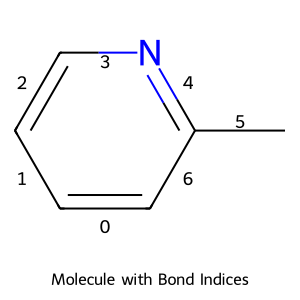

In [78]:
for atom in m.GetAtoms():
    atom.SetProp("atomNote", "")  # Use "atomNote" to display atom indices

# # Draw the molecule with atom indices
# img = Draw.MolToImage(m, legend="Molecule with Atom Indices")
# img.show()

for bond in m.GetBonds():
    bond.SetProp("bondNote", str(bond.GetIdx()))  # Use "bondNote" to display bond indices

# Draw the molecule with bond indices
img = Draw.MolToImage(m, legend="Molecule with Bond Indices")
img.show()

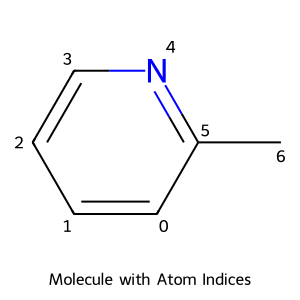

In [101]:
atoms

{0, 4, 5, 6}

cc(C)n


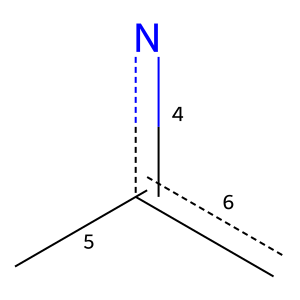

cc(C)n
nc(c)C


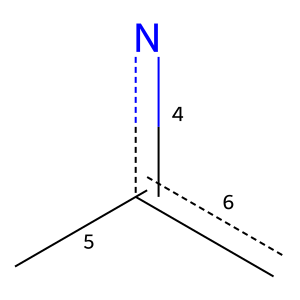

cc(C)n
c(c)(C)n


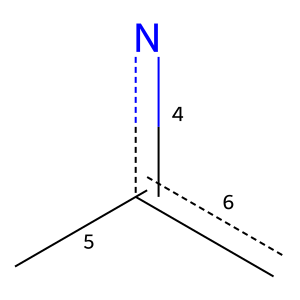

cc(C)n
Cc(c)n


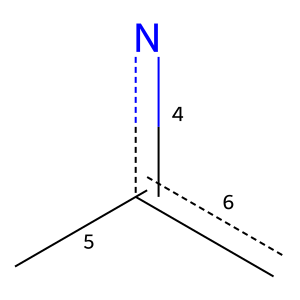

cc(C)n


In [103]:
for atom_idx in atoms:
    smiles = (Chem.MolFragmentToSmiles(m,atomsToUse=list(atoms),bondsToUse=env,rootedAtAtom=atom_idx,canonical=True))
    print(smiles)
    
    tmp_mol = Chem.PathToSubmol(m, env)
    smiles = Chem.MolToSmiles(tmp_mol)
    
    # tmp_mol = Chem.MolFromSmiles(smiles)
    img = Draw.MolToImage(tmp_mol)
    img.show()
    print(smiles)
    

In [93]:
type(tmp_mol)

NoneType

In [29]:
for x in env:
    print(x)
print(len(env))

2
3
1
4
0
5
6
7
